In [1644]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import re

In [1645]:
dfTrain= pd.read_csv('Train.csv',parse_dates=['date'])
dfTest = pd.read_csv('Test.csv',parse_dates=['date'])
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [1646]:
dfTrain.drop_duplicates()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877
...,...,...,...,...,...,...,...,...,...
5424,b6aa30da97fa3c95989c47ccf5ab4e9f,627,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone - Web,2019-11-20,0,0,0,20.601
5425,58b62e9fa867d622662b8a4096fdc3f0,6710,Product/4.2.2 iPhone/7.1.1,iPhone - iOS,2019-09-26,0,0,0,1537.666
5426,109f7f9b8384e46fc88f580b328298e8,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,2019-08-13,0,0,0,22.711
5427,ac6579972e89dfc78d3ee95d15764681,913,NaN,Unknown - MobileWeb,2019-06-18,0,0,0,20.844


In [1647]:
dfTrain.tail()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
5424,b6aa30da97fa3c95989c47ccf5ab4e9f,627,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone - Web,2019-11-20,0,0,0,20.601
5425,58b62e9fa867d622662b8a4096fdc3f0,6710,Product/4.2.2 iPhone/7.1.1,iPhone - iOS,2019-09-26,0,0,0,1537.666
5426,109f7f9b8384e46fc88f580b328298e8,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,2019-08-13,0,0,0,22.711
5427,ac6579972e89dfc78d3ee95d15764681,913,NaN,Unknown - MobileWeb,2019-06-18,0,0,0,20.844
5428,bd8f8239b827fc29d4e1bec91bd499b7,1254,Mozilla/5.0 (iPhone; CPU iPhone OS 7_0_4 like ...,iPhone - Web,2019-10-21,0,0,0,20.504


In [1648]:
#checking for negative, min/max ,std and values distribution
dfTrain.describe()

,session_number,purchased,added_in_cart,checked_out,time_spent
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,1072.835329,0.159145,0.162092,0.017499,663.194292
std,1436.351474,0.365845,0.368570,0.131132,1713.671664
min,11.000000,0.000000,0.000000,0.000000,14.400000
25%,121.000000,0.000000,0.000000,0.000000,22.699000
50%,517.000000,0.000000,0.000000,0.000000,98.312000
75%,1397.000000,0.000000,0.000000,0.000000,600.463000
max,7722.000000,1.000000,1.000000,1.000000,38494.025000


In [1653]:
dfTrain.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [1654]:
dfTest.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64

In [1655]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_id      5429 non-null   object        
 1   session_number  5429 non-null   int64         
 2   client_agent    5269 non-null   object        
 3   device_details  5429 non-null   object        
 4   date            5429 non-null   datetime64[ns]
 5   purchased       5429 non-null   int64         
 6   added_in_cart   5429 non-null   int64         
 7   checked_out     5429 non-null   int64         
 8   time_spent      5429 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 381.9+ KB


In [1656]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_id      2327 non-null   object        
 1   session_number  2327 non-null   int64         
 2   client_agent    2268 non-null   object        
 3   device_details  2327 non-null   object        
 4   date            2327 non-null   datetime64[ns]
 5   purchased       2327 non-null   int64         
 6   added_in_cart   2327 non-null   int64         
 7   checked_out     2327 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 145.6+ KB


In [1659]:
dfTrain.shape, dfTest.shape

((5429, 9), (2327, 8))

In [1660]:
if dfTrain.session_id.nunique() == dfTrain.shape[0]:
    print("session_id is unique")
dfTrain.session_id.nunique()   

session_id is unique


5429

In [1661]:
if dfTrain.session_number.nunique() == dfTrain.shape[0]:
    print("session_number is unique")
dfTrain.session_number.nunique()

610

In [1662]:
dfTrain.client_agent.nunique()

698

In [1663]:
dfTrain.client_agent.value_counts()

Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201    209
Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; rv:11.0) like Gecko                                       163
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                              148
Product/4.2.0 iPhone/7.1.1                                                                                        146
Product/4.7.0 iPhone/8.1.2                                                                                        144
                                                                                                                 ... 
Product/4.1.1 iPhone/7.1                                                                                            1
Product/150297 Android/4.4.2 Device/samsung_SM-G900F Carrier/StarHub Type/Mobile                                    1
Product/3.5.1 iPhone/7.1.1                              

In [1664]:
dfTrain['Device_org'] = dfTrain["device_details"].str.split('-').str[0]
dfTrain['Platform_org'] = dfTrain["device_details"].str.split('-').str[1]

dfTest['Device_org'] = dfTest["device_details"].str.split('-').str[0]
dfTest['Platform_org'] = dfTest["device_details"].str.split('-').str[1]

In [1665]:
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,Desktop,Chrome
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,iPhone,iOS
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,iPhone,MobileWeb
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,Desktop,IE
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,iPhone,Web


In [1666]:
#after inspecing the client_agent and device details we can see that more data can be extracted for many rows
#as the device details does not provide much details on device platform we can extract it through the client_agent details
def split_client_agent(df):
#     df['Platform_org'] = ["nan" for i in range(len(df))]
#     df["Device_org"] = ["nan" for i in range(len(df))]
#     for i,text in enumerate(df['device_details']):
#         df['Device_org'].iloc[i],df['Platform_org'].iloc[i] = re.split(" - ", text)
        
    df["Platform"] = ["nan" for i in range(len(df))]
    df["Device"] = ["nan" for i in range(len(df))]
    
    app_count=0
    mozilla_count=0
    safari_count=0
    chrome_count=0
    firefox_count=0
    opera_count=0
    
    iphone_count=0
    ipad_count=0
    windows_count=0
    android_count=0
    linux_count=0
    mac_count=0
    apple_device_count=0
    count=0
    
    #iterating through the dataframe and adding counts for each encountered instance and adding found instance to new column
    for i,text in enumerate(df["client_agent"]):
        if type(text) == str:
            count+=1
            
            if 'product' in text.lower():
                app_count+=1
                df["Platform"].iloc[i]='app'
            
            elif 'mozilla' in text.lower():
                mozilla_count+=1
                df['Platform'].iloc[i]='mozilla'
            
            elif 'chrome' in text.lower():
                chrome_count+=1
                df['Platform'].iloc[i]='chrome'
            
            elif 'safari' in text.lower():
                safari_count+=1
                df['Platform'].iloc[i]='safari'
            
            elif 'firefox' in text.lower():
                firefox_count+=1
                df['Platform'].iloc[i]='firefox'   
            
            elif 'opera' in text.lower():
                opera_count+=1
                df['Platform'].iloc[i]='opera'
                
            
            
            if "windows" in text.lower():
                windows_count+=1
                df["Device"].iloc[i] = "windows"

            elif "iphone" in text.lower():
                iphone_count+=1
                df["Device"].iloc[i] = "iphone"

            elif "ipad" in text.lower():
                ipad_count+=1
                df["Device"].iloc[i] = "ipad"

            elif "android" in text.lower():
                android_count+=1
                df["Device"].iloc[i] = "android"

            elif "macintosh" in text.lower():
                mac_count+=1        
                df["Device"].iloc[i] = "macintosh"
                
            elif "linux" in text.lower():
                linux_count+=1        
                df["Device"].iloc[i] = "linux"
                
            elif 'cfnetwork' in text.lower():
                apple_device_count+=1
                df['Device'].iloc[i]='apple device'
                
    print("Total Count:", count)
    print("**"*20)
    print("app_count:", app_count)
    print("mozilla_count:", mozilla_count)
    print("chrome_count:", chrome_count)
    print("safari_count:", safari_count)   
    print("firefox_count:", firefox_count)
    print("opera_count:", opera_count)
    print("**"*20)
    print("windows_count:", windows_count)    
    print("iphone_count:", iphone_count)
    print("ipad_count:", ipad_count)
    print("android_count:", android_count)    
    print("mac_count:", mac_count)
    print("linux_count:", linux_count)
    print("apple_device_count:", apple_device_count)
    
    return df

In [1667]:
dfTrain =split_client_agent(dfTrain)
dfTrain.head()

e:\pythonforselenium\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Total Count: 5269
****************************************
app_count: 2076
mozilla_count: 3153
chrome_count: 0
safari_count: 1
firefox_count: 0
opera_count: 6
****************************************
windows_count: 1130
iphone_count: 2459
ipad_count: 364
android_count: 490
mac_count: 729
linux_count: 6
apple_device_count: 58


,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org,Platform,Device
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,Desktop,Chrome,mozilla,windows
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,iPhone,iOS,app,iphone
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,iPhone,MobileWeb,mozilla,iphone
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,Desktop,IE,mozilla,windows
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,iPhone,Web,mozilla,iphone


In [1668]:
# dfTrain.to_csv('Train_client.csv')

In [1669]:
dfTrain.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
Device_org          0
Platform_org        0
Platform            0
Device              0
dtype: int64

In [1670]:
dfTest.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
Device_org         0
Platform_org       0
dtype: int64

In [1671]:
dfTest =split_client_agent(dfTest)
dfTest.head()

e:\pythonforselenium\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Total Count: 2268
****************************************
app_count: 863
mozilla_count: 1382
chrome_count: 0
safari_count: 0
firefox_count: 0
opera_count: 4
****************************************
windows_count: 526
iphone_count: 1048
ipad_count: 166
android_count: 178
mac_count: 299
linux_count: 2
apple_device_count: 28


,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0,Desktop,IE,mozilla,windows
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0,Android Phone,Android,app,android
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0,iPhone,iOS,app,iphone
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0,Desktop,IE,mozilla,windows
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0,Desktop,Chrome,mozilla,windows


In [1672]:
dfTrain.replace("Typhoeus - https://github.com/typhoeus/typhoeus","nan",inplace=True)
dfTest.replace("Typhoeus - https://github.com/typhoeus/typhoeus","nan",inplace=True)

In [1673]:
dfTrain.replace("nan", np.nan, inplace=True)
dfTest.replace('nan',np.nan, inplace=True)

In [1674]:
dfTrain.fillna(method="ffill", inplace=True)
dfTest.fillna(method="ffill", inplace=True)

In [1675]:
dfTrain.device_details.value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [1676]:
dfTrain.device_details.nunique()

17

In [1677]:
dfTrain.date.nunique()

342

0    4565
1     864
Name: purchased, dtype: int64

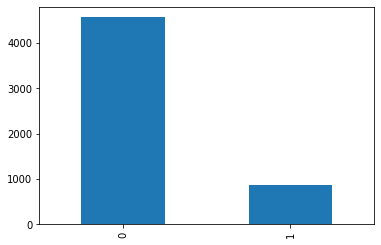

In [1678]:
dfTrain.purchased.value_counts().plot(kind='bar')
dfTrain.purchased.value_counts()

0    4549
1     880
Name: added_in_cart, dtype: int64

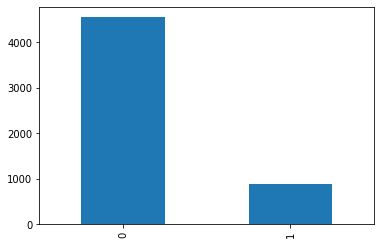

In [1679]:
dfTrain.added_in_cart.value_counts().plot(kind='bar')
dfTrain.added_in_cart.value_counts()

0    5334
1      95
Name: checked_out, dtype: int64

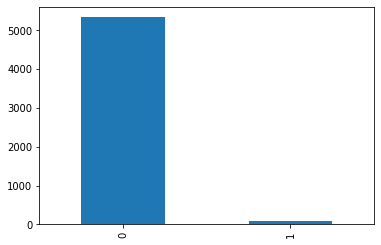

In [1680]:
dfTrain.checked_out.value_counts().plot(kind='bar')
dfTrain.checked_out.value_counts()

In [1681]:
skew(dfTrain['time_spent'])

8.035340699877555

In [1682]:
skew(np.log(dfTrain['time_spent']))

0.49210782340687975

e:\pythonforselenium\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


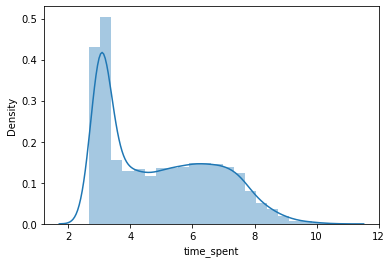

In [1683]:
sns.distplot(np.log(dfTrain['time_spent']))
plt.show()

e:\pythonforselenium\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


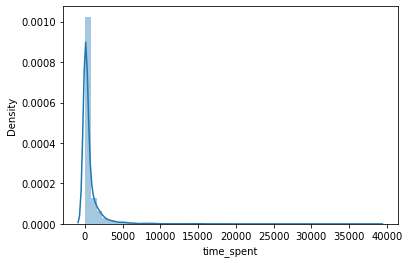

In [1684]:
sns.distplot(dfTrain['time_spent'])
plt.show()

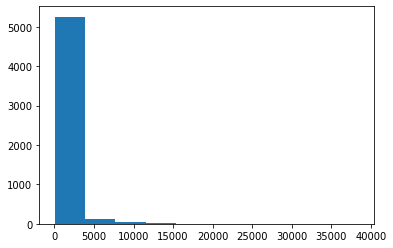

In [1685]:
plt.hist(dfTrain['time_spent'])
plt.show()

In [1686]:
dfTrain.groupby('session_number')['time_spent'].mean()

session_number
11      494.134828
22      737.616760
33      913.697803
44      606.066594
55      476.672914
           ...    
7678     22.437000
7689    169.578000
7700     31.313000
7711     20.191000
7722    167.263000
Name: time_spent, Length: 610, dtype: float64

In [1687]:
#nothing to infer from session_id column
dfTrain['session_id'].str[:2].nunique()

256

In [1688]:
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org,Platform,Device
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,Desktop,Chrome,mozilla,windows
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,iPhone,iOS,app,iphone
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,iPhone,MobileWeb,mozilla,iphone
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,Desktop,IE,mozilla,windows
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,iPhone,Web,mozilla,iphone


In [1689]:
dfTrain['session_id'].str[:4].nunique()

5206

In [1690]:
dfTrain['session_id'].str[:6].nunique()

5429

In [1691]:
# dfTrain = dfTrain.fillna('unknown')
# dfTest = dfTest.fillna('unknown')

In [1692]:
dfTrain=dfTrain.replace('-unknown-','unknown')
dfTest=dfTest.replace('-unknown-','unknown')

In [1693]:
# since there is a category called '-unknown-' already avaialable for unknown values replaced missing values with -unknown-
dfTrain.isnull().sum()

session_id        0
session_number    0
client_agent      0
device_details    0
date              0
purchased         0
added_in_cart     0
checked_out       0
time_spent        0
Device_org        0
Platform_org      0
Platform          0
Device            0
dtype: int64

In [1694]:
dfTest.isnull().sum()

session_id        0
session_number    0
client_agent      0
device_details    0
date              0
purchased         0
added_in_cart     0
checked_out       0
Device_org        0
Platform_org      0
Platform          0
Device            0
dtype: int64

In [1695]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [1696]:
for column in ['Platform_org','Device_org','Platform','Device']:
    dfTrain[column]=le.fit_transform(dfTrain[column])
    dfTest[column] = le.fit_transform(dfTest[column])
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org,Platform,Device
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,2,1,1,6
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,6,8,0,3
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,6,4,1,3
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,2,3,1,6
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,6,7,1,3


In [1697]:
dfTest.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0,2,3,1,6
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0,0,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0,6,8,0,3
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0,2,3,1,6
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0,2,1,1,6


In [1698]:
dfTrain= dfTrain.drop(['session_id','client_agent','device_details'], axis=1)
dfTest = dfTest.drop(['session_id','client_agent','device_details'],axis=1)

In [1699]:
dfTrain.head()

,session_number,date,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org,Platform,Device
0,715,2020-01-22,1,0,0,236.886,2,1,1,6
1,55,2020-02-27,1,0,0,1277.455,6,8,0,3
2,11,2019-08-01,0,0,0,21.704,6,4,1,3
3,2794,2019-12-30,0,1,0,455.201,2,3,1,6
4,3674,2019-09-10,0,0,0,1164.877,6,7,1,3


In [1700]:
# dfTrain['Month'] = dfTrain['date'].dt.month
# dfTrain['Year'] = dfTrain['date'].dt.year
# dfTrain['DayOfWeek']=dfTrain['date'].dt.dayofweek 

# dfTest['Month'] = dfTest['date'].dt.month
# dfTest['Year'] = dfTest['date'].dt.year
# dfTest['DayOfWeek']=dfTest['date'].dt.dayofweek 

In [1701]:
dfTest.head()

,session_number,date,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device
0,99,2020-01-07,1,0,0,2,3,1,6
1,935,2020-02-13,0,0,0,0,0,0,0
2,902,2019-10-14,1,0,0,6,8,0,3
3,3223,2020-01-26,0,0,0,2,3,1,6
4,231,2020-01-29,0,0,0,2,1,1,6


In [1702]:
# # convert date column to unique value subtracting the max value 
dfTrain['datepurch']=dfTrain['date'].max()-dfTrain['date']
dfTest['datepurch']=dfTest['date'].max()-dfTest['date']
dfTrain.head()

,session_number,date,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org,Platform,Device,datepurch
0,715,2020-01-22,1,0,0,236.886,2,1,1,6,92 days
1,55,2020-02-27,1,0,0,1277.455,6,8,0,3,56 days
2,11,2019-08-01,0,0,0,21.704,6,4,1,3,266 days
3,2794,2019-12-30,0,1,0,455.201,2,3,1,6,115 days
4,3674,2019-09-10,0,0,0,1164.877,6,7,1,3,226 days


In [1703]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   session_number  5429 non-null   int64          
 1   date            5429 non-null   datetime64[ns] 
 2   purchased       5429 non-null   int64          
 3   added_in_cart   5429 non-null   int64          
 4   checked_out     5429 non-null   int64          
 5   time_spent      5429 non-null   float64        
 6   Device_org      5429 non-null   int32          
 7   Platform_org    5429 non-null   int32          
 8   Platform        5429 non-null   int32          
 9   Device          5429 non-null   int32          
 10  datepurch       5429 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int32(4), int64(4), timedelta64[ns](1)
memory usage: 381.9 KB


In [1704]:
dfTrain['datepurch']= dfTrain['datepurch'].astype(str)
dfTest['datepurch']= dfTest['datepurch'].astype(str)

In [1705]:
dfTrain['datepurch']= dfTrain['datepurch'].str.split(' ').str[0]
dfTest['datepurch']= dfTest['datepurch'].str.split(' ').str[0]

In [1706]:
dfTrain['datepurch']= dfTrain['datepurch'].astype(int)
dfTest['datepurch']= dfTest['datepurch'].astype(int)

In [1707]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_number  5429 non-null   int64         
 1   date            5429 non-null   datetime64[ns]
 2   purchased       5429 non-null   int64         
 3   added_in_cart   5429 non-null   int64         
 4   checked_out     5429 non-null   int64         
 5   time_spent      5429 non-null   float64       
 6   Device_org      5429 non-null   int32         
 7   Platform_org    5429 non-null   int32         
 8   Platform        5429 non-null   int32         
 9   Device          5429 non-null   int32         
 10  datepurch       5429 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(5), int64(4)
memory usage: 360.6 KB


In [1708]:
dfTrain=dfTrain.drop('date',axis=1)
dfTest=dfTest.drop('date',axis=1)
dfTrain.head()

,session_number,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org,Platform,Device,datepurch
0,715,1,0,0,236.886,2,1,1,6,92
1,55,1,0,0,1277.455,6,8,0,3,56
2,11,0,0,0,21.704,6,4,1,3,266
3,2794,0,1,0,455.201,2,3,1,6,115
4,3674,0,0,0,1164.877,6,7,1,3,226


In [1709]:
dfTest.head()

,session_number,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device,datepurch
0,99,1,0,0,2,3,1,6,103
1,935,0,0,0,0,0,0,0,66
2,902,1,0,0,6,8,0,3,188
3,3223,0,0,0,2,3,1,6,84
4,231,0,0,0,2,1,1,6,81


In [1710]:
dfTest.shape

(2327, 9)

In [1711]:
X=dfTrain.drop('time_spent',axis=1)
y=dfTrain['time_spent']

In [1712]:
X.head()

,session_number,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device,datepurch
0,715,1,0,0,2,1,1,6,92
1,55,1,0,0,6,8,0,3,56
2,11,0,0,0,6,4,1,3,266
3,2794,0,1,0,2,3,1,6,115
4,3674,0,0,0,6,7,1,3,226


In [1713]:
pd.notnull(X)

,session_number,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device,datepurch
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
5424,True,True,True,True,True,True,True,True,True
5425,True,True,True,True,True,True,True,True,True
5426,True,True,True,True,True,True,True,True,True
5427,True,True,True,True,True,True,True,True,True


In [1714]:
pd.notnull(y)

0       True
1       True
2       True
3       True
4       True
        ... 
5424    True
5425    True
5426    True
5427    True
5428    True
Name: time_spent, Length: 5429, dtype: bool

# Linear Regression

In [1715]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1716]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=2)

In [1717]:
pd.notnull(X_train)

,session_number,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device,datepurch
744,True,True,True,True,True,True,True,True,True
1145,True,True,True,True,True,True,True,True,True
661,True,True,True,True,True,True,True,True,True
3994,True,True,True,True,True,True,True,True,True
1142,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
3335,True,True,True,True,True,True,True,True,True
1099,True,True,True,True,True,True,True,True,True
2514,True,True,True,True,True,True,True,True,True
3606,True,True,True,True,True,True,True,True,True


In [1729]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=abs(model.predict(X_test))

In [1730]:
y_pred

array([1.09623205e+03, 1.47837188e+02, 8.35641784e+02, 1.08444642e+03,
       4.03891900e+02, 1.14271093e+03, 1.12896869e+03, 4.12215129e+02,
       1.17946671e+03, 1.58498738e+02, 4.37113293e+02, 4.39353824e+02,
       2.01004168e+03, 8.92801906e+01, 1.19854227e+03, 4.61783946e+02,
       8.16814532e+01, 1.23280334e+03, 2.93593295e+02, 2.30184028e+02,
       2.01512603e+02, 3.87690261e+02, 3.35455726e+03, 8.37932401e+02,
       5.00835088e+02, 3.57051798e+02, 1.13544445e+03, 2.27036194e+02,
       8.55520858e+02, 4.14612083e+02, 1.79889949e+02, 1.21735288e+03,
       4.51445739e+02, 3.35720730e+02, 5.61516140e+02, 1.10543004e+03,
       3.10248428e+02, 1.52532898e+03, 1.48897168e+03, 4.83273372e+02,
       3.88710883e+01, 4.48166377e+02, 1.99288759e+01, 2.22726695e+03,
       2.60596244e+02, 1.70669802e+02, 7.13351670e+01, 1.72045066e+02,
       3.10976917e+02, 1.09637025e+03, 2.10954712e+02, 1.92256482e+03,
       3.81556195e+02, 4.13510423e+02, 1.01104572e+03, 3.04230795e+02,
      

In [1721]:
# #validation test results 
# pred_submission=pd.DataFrame({'time_spent':y_pred})
# pred_submission.to_csv('pred_submission.csv',index=False)

In [1722]:
from sklearn.metrics import mean_squared_log_error

In [1723]:
msle= np.sqrt(mean_squared_log_error(y_test,y_pred))
msle

2.06949301128767

In [1724]:
y_pred_test=abs(model.predict(dfTest))

In [1725]:
len(y_pred_test)

2327

In [1726]:
# samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
# samplesubmission.to_csv('samplesubmissionLR.csv',index=False)

In [1727]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# DecisionTree Regressor

In [1731]:
modelDTR = DecisionTreeRegressor()

In [1732]:
modelDTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [1733]:
y_pred_test=abs(modelDTR.predict(dfTest))

In [1734]:
samplesubmissionDT = pd.DataFrame({'time_spent':y_pred_test})
samplesubmissionDT.to_csv('submissionDT.csv',index=False)

# Random Forest Regressor

In [1634]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
modelRFR.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [1635]:
y_pred_test= abs(modelRFR.predict(dfTest))

In [1636]:
samplesubmissionRF = pd.DataFrame({'time_spent':y_pred_test})
samplesubmissionRF.to_csv('SubmissionRF.csv',index=False)

# Gradient Boosting Regresssor

In [1637]:
from sklearn.ensemble import GradientBoostingRegressor
modelGBR = GradientBoostingRegressor(random_state = 0)
modelGBR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [1638]:
y_pred_test=abs(modelGBR.predict(dfTest))

In [1639]:
samplesubmissionGB = pd.DataFrame({'time_spent':y_pred_test})
samplesubmissionGB.to_csv('SubmissionGB.csv',index=False)

# Support vector Regressor

In [1738]:
from sklearn.svm import SVR
modelSVR = SVR(kernel = 'rbf')
modelSVR.fit(X, y)

SVR()

In [1739]:
y_pred_test=abs(modelSVR.predict(dfTest))

In [1741]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionSVR.csv',index=False)

e:\pythonforselenium\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


<AxesSubplot:ylabel='Density'>

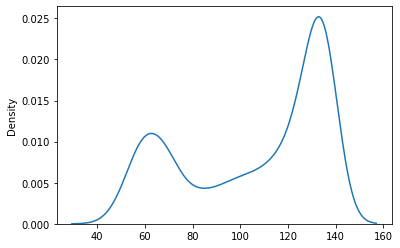

In [1742]:
sns.kdeplot(y_pred_test)